*   Name : Raval Meet
*   Enrollment No : 200090107072
*   Div : A

## CO-1 ASSIGNMENT:


1. Implement the techniques to deal with outliers. - https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/


Original Data:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


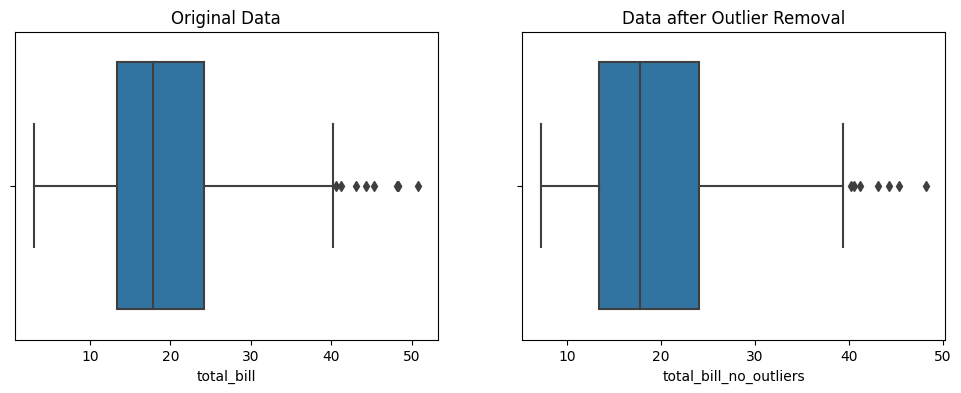

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset (you can choose any built-in dataset from Seaborn)
# We'll use the 'tips' dataset for this example
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Define a function to visualize the data and outliers
def plot_with_outliers(data, column_name):
    plt.figure(figsize=(12, 4))

    # Plot the original data
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column_name])
    plt.title("Original Data")

    # Plot the data after outlier removal
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column_name+'_no_outliers'])
    plt.title("Data after Outlier Removal")

    plt.show()

# Method 1: Z-score Treatment
def z_score_outlier_treatment(data, column_name):
    from scipy import stats

    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(data[column_name]))

    # Define a threshold for considering data as outliers (e.g., Z-score > 3)
    threshold = 3

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where(np.abs(z_scores) > threshold, np.nan, data[column_name])

# Method 2: IQR Based Filtering
def iqr_outlier_treatment(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), np.nan, data[column_name])

# Method 3: Percentile Method (Winsorization)
def percentile_outlier_treatment(data, column_name):
    # Define the percentiles for lower and upper limits (e.g., 1% and 99%)
    lower_percentile = 1
    upper_percentile = 99

    # Calculate the lower and upper limits based on percentiles
    lower_limit = np.percentile(data[column_name], lower_percentile)
    upper_limit = np.percentile(data[column_name], upper_percentile)

    # Create a new column to store data without outliers
    data[column_name+'_no_outliers'] = np.where((data[column_name] < lower_limit) | (data[column_name] > upper_limit), np.nan, data[column_name])

# Apply outlier treatment methods to the 'total_bill' column
column_name = 'total_bill'
z_score_outlier_treatment(data, column_name)
iqr_outlier_treatment(data, column_name)
percentile_outlier_treatment(data, column_name)

# Plot the results of outlier treatment
plot_with_outliers(data, column_name)

2. Implement the techniques to deal with missing values.
https://note.nkmk.me/en/python-pandas-interpolate/
https://www.kdnuggets.com/2022/07/scikitlearn-imputer.html#:~:text=The%20imputer%20is%20an%20estimator,frequently%20used%20and%20constant%20value.
https://www.geeksforgeeks.org/principal-component-analysis-with-python/


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Introduce missing values artificially
missing_mask = np.random.rand(*X.shape) < 0.2  # 20% missing values
X_with_missing = X.copy()
X_with_missing[missing_mask] = np.nan

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.column_stack((X_with_missing, y)), columns=iris.feature_names + ['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_missing, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a RandomForestClassifier on the imputed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_imputed)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set after imputation: {accuracy:.2f}")

Accuracy on the test set after imputation: 1.00


## CO-2 ASSIGNMENT:


3. Implement distance measuring techniques for two features of your dataset: (a) Euclidean (b)Minkowski (c) Manhattan (d) Jaccard (e) Cosine (f) Simple matching coefficient (g)hamming (distance libraries-numpy, scipy, math)


In [10]:
import numpy as np
from scipy.spatial import distance
import math
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
feature_names = iris.feature_names  # Feature names

# Select two features: Sepal Length (feature 0) and Sepal Width (feature 1)
feature1 = X[:, 0]
feature2 = X[:, 1]

# (a) Euclidean Distance
euclidean_dist = np.linalg.norm(feature1 - feature2)

# (b) Minkowski Distance (p=3 for example)
p = 3
minkowski_dist = distance.minkowski(feature1, feature2, p=p)

# (c) Manhattan Distance
manhattan_dist = distance.cityblock(feature1, feature2)

# (d) Jaccard Distance (for binary data, e.g., sets)
# Since the features are continuous, Jaccard distance is not applicable here

# (e) Cosine Similarity (use 1 - Cosine similarity for Cosine distance)
cosine_dist = 1 - np.dot(feature1, feature2) / (np.linalg.norm(feature1) * np.linalg.norm(feature2))

# (f) Simple Matching Coefficient
# Since the features are continuous, SMC distance is not applicable here

# (g) Hamming Distance (for binary data, e.g., strings)
# Since the features are continuous, Hamming distance is not applicable here

# Print the calculated distances
print(f"(a) Euclidean Distance: {euclidean_dist:.2f}")
print(f"(b) Minkowski Distance (p={p}): {minkowski_dist:.2f}")
print(f"(c) Manhattan Distance: {manhattan_dist:.2f}")
print(f"(e) Cosine Distance: {cosine_dist:.2f}")


(a) Euclidean Distance: 36.16
(b) Minkowski Distance (p=3): 16.42
(c) Manhattan Distance: 417.90
(e) Cosine Distance: 0.02


4. Implement any data reduction technique.


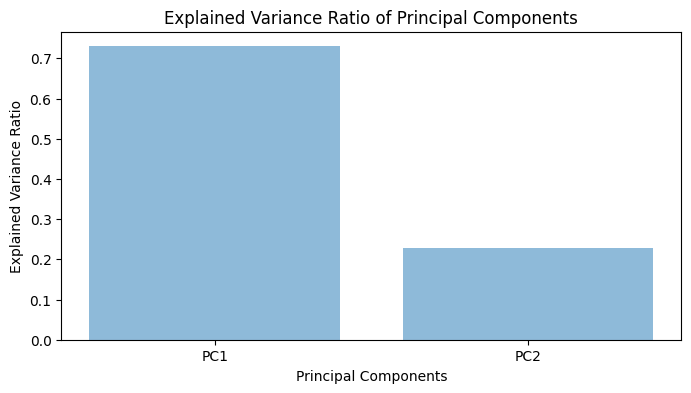

        PC1       PC2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
feature_names = iris.feature_names

# Standardize the data (important for PCA)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply PCA to reduce dimensionality
n_components = 2  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the reduced data with the target variable
final_df = pd.concat([pca_df, pd.Series(y, name='target')], axis=1)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 4))
plt.bar(range(n_components), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(n_components), [f'PC{i+1}' for i in range(n_components)])
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Display the first few rows of the reduced data
print(final_df.head())

## CO-3 ASSIGNMENT:

5. Implement various knn classification algorithms and do prediction for unknown data.


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define k-NN classifiers with different algorithms
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_chebyshev = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')

# Train the k-NN classifiers on the training data
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_chebyshev.fit(X_train, y_train)

# Predict the classes for the test data
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_chebyshev = knn_chebyshev.predict(X_test)

# Calculate accuracy for each k-NN classifier
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)

# Print the accuracy results
print("Accuracy (Euclidean Distance): {:.2f}".format(accuracy_euclidean))
print("Accuracy (Manhattan Distance): {:.2f}".format(accuracy_manhattan))
print("Accuracy (Chebyshev Distance): {:.2f}".format(accuracy_chebyshev))

Accuracy (Euclidean Distance): 1.00
Accuracy (Manhattan Distance): 1.00
Accuracy (Chebyshev Distance): 1.00


6. Implement a decision tree classification algorithm.


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



7. Implement a support vector machine algorithm.


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8. Implement regression algorithms: (a)linear regression(b)logistic regression


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california_housing = fetch_california_housing()

# Use california_housing.data as features and california_housing.target as the target variable
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.5558915986952422
R-squared (R2) Score: 0.5757877060324524


## CO-4 ASSIGNMENT:


9. Implement k-means/k-medoid clustering algorithms and do prediction for unknown data.


In [16]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


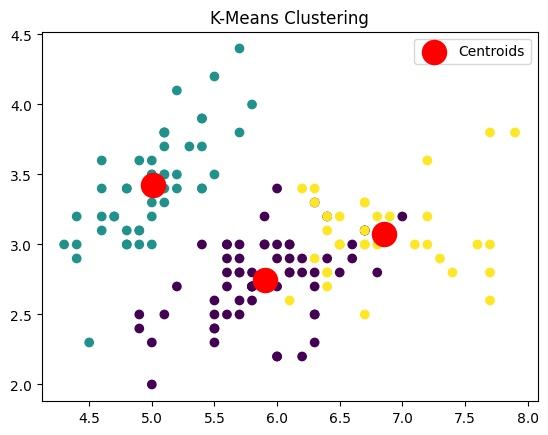

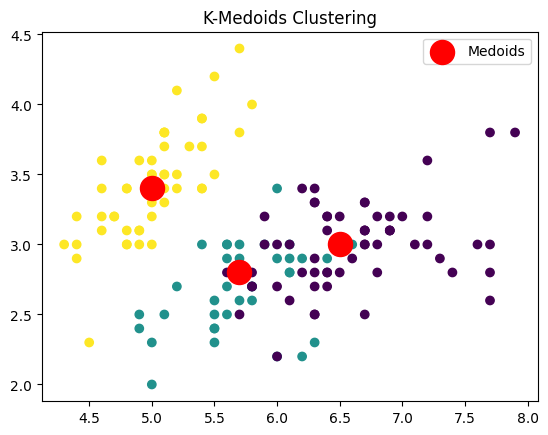

K-Means Prediction for Unknown Data: [1 2]
K-Medoids Prediction for Unknown Data: [2 0]


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)

# Predict clusters for the data points
kmeans_labels = kmeans.predict(X)
kmedoids_labels = kmedoids.predict(X)

# Visualize the clusters for K-Means
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Visualize the clusters for K-Medoids
plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

# Predict clusters for unknown data points
unknown_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.2, 2.0]])  # Replace with your own data
kmeans_prediction = kmeans.predict(unknown_data)
kmedoids_prediction = kmedoids.predict(unknown_data)

print("K-Means Prediction for Unknown Data:", kmeans_prediction)
print("K-Medoids Prediction for Unknown Data:", kmedoids_prediction)

10. Implement hierarchical clustering algorithms and do prediction for unknown data.


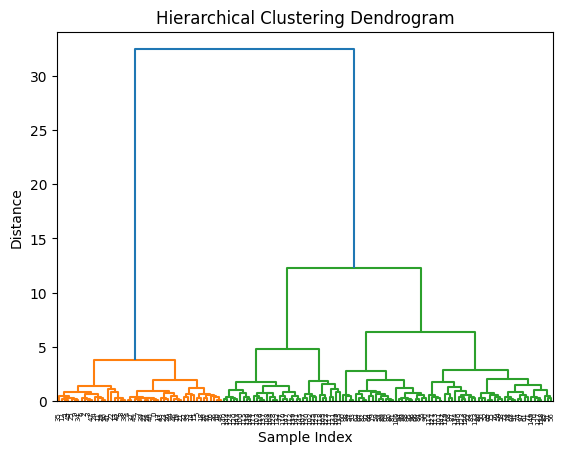

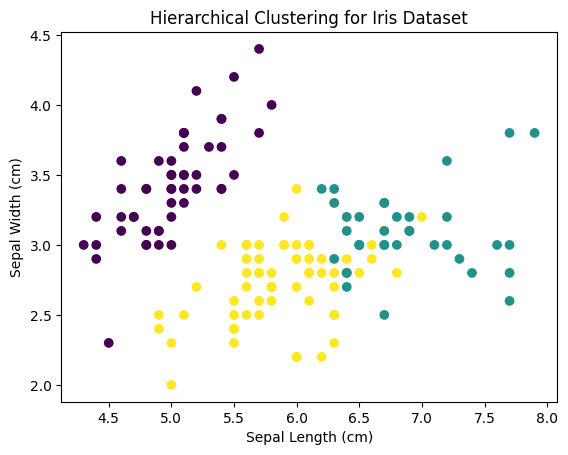

Clusters for Unknown Data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Create a dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the number of clusters using the dendrogram
num_clusters = 3  # Adjust this based on the dendrogram

# Perform clustering to assign data points to clusters
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Visualize the clusters for the Iris dataset
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering for Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Predict clusters for unknown data points
unknown_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.2, 2.0]])  # Replace with your own data

# Rebuild the linkage matrix with the unknown data points
linkage_matrix_unknown = linkage(unknown_data, method='ward', metric='euclidean')

# Assign clusters to the unknown data points
unknown_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

print("Clusters for Unknown Data:", unknown_clusters)

11. Implement DBSCAN clustering algorithms and do prediction for unknown data.


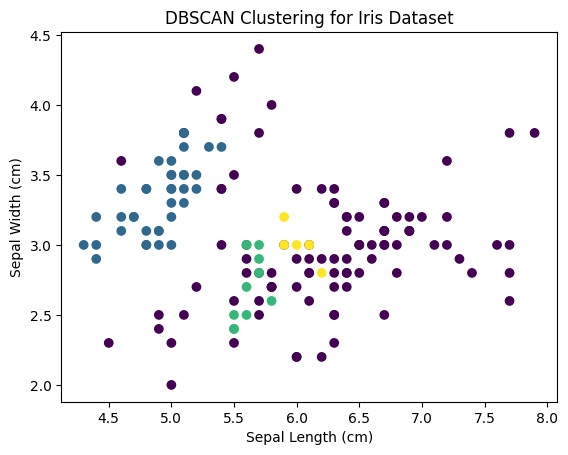

Clusters for Unknown Data: [-1 -1]


In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering for Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Predict clusters for unknown data points (replace with your own data)
unknown_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.2, 2.0]])  # Replace with your own data
unknown_clusters = dbscan.fit_predict(unknown_data)

print("Clusters for Unknown Data:", unknown_clusters)

12. Implement apriori algorithm to get association rules.

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample transaction data (replace with your own dataset)
data = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': ['A, B, D', 'B, C', 'A, C, D', 'A, D', 'B, C']
})

# Split items in the 'Items' column and create binary columns
items_df = data['Items'].str.get_dummies(', ')

# Concatenate the binary columns with the original DataFrame
data = pd.concat([data, items_df], axis=1)

# Drop the original 'Items' column
data.drop('Items', axis=1, inplace=True)

# Apply Apriori algorithm
frequent_itemsets = apriori(data.drop('TransactionID', axis=1), min_support=0.5, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display association rules
print("Association Rules:")
print(rules)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0         (D)         (A)                 0.6                 0.6      0.6   
1         (A)         (D)                 0.6                 0.6      0.6   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  1.666667      0.24         inf            1.0  
1         1.0  1.666667      0.24         inf            1.0  


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


13. Implement backpropagation neural network algorithm.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the neural network
clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


14. Make a comparison tables for classification and clustering algorithms, for what you implemented here:

(a) Write unknown data:

(b)Compare performance of classification algorithms


In [22]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the models
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='micro')
recall_knn = recall_score(y_test, y_pred_knn, average='micro')
f1_knn = f1_score(y_test, y_pred_knn, average='micro')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='micro')
recall_dt = recall_score(y_test, y_pred_dt, average='micro')
f1_dt = f1_score(y_test, y_pred_dt, average='micro')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='micro')
recall_svm = recall_score(y_test, y_pred_svm, average='micro')
f1_svm = f1_score(y_test, y_pred_svm, average='micro')

# Printing results in a table
print("Comparison Table for Classification Algorithms:")
print("{:<15} {:<10} {:<12} {:<10} {:<10} {:<10} {:<20}".format('Algorithm name', 'Accuracy', 'Sensitivity', 'F-measure', 'Precision', 'Recall', 'Prediction for unknown data'))
print("{:<15} {:<10.2f} {:<12.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<20}".format('KNN', accuracy_knn, recall_knn, f1_knn, precision_knn, recall_knn, str(y_pred_knn)))
print("{:<15} {:<10.2f} {:<12.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<20}".format('Decision Tree', accuracy_dt, recall_dt, f1_dt, precision_dt, recall_dt, str(y_pred_dt)))
print("{:<15} {:<10.2f} {:<12.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<20}".format('SVM', accuracy_svm, recall_svm, f1_svm, precision_svm, recall_svm, str(y_pred_svm)))




Comparison Table for Classification Algorithms:
Algorithm name  Accuracy   Sensitivity  F-measure  Precision  Recall     Prediction for unknown data
KNN             1.00       1.00         1.00       1.00       1.00       [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Decision Tree   1.00       1.00         1.00       1.00       1.00       [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
SVM             1.00       1.00         1.00       1.00       1.00       [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



(c) Compare performance of clustering algorithms you implemented.

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in X

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
agg_labels = agg.labels_
agg_silhouette_score = silhouette_score(X, agg_labels)

# Printing the results
print("Comparison of Clustering Algorithms:")
print(f"K-means Silhouette Score: {kmeans_silhouette_score}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

Comparison of Clustering Algorithms:
K-means Silhouette Score: 0.5528190123564095
Agglomerative Clustering Silhouette Score: 0.5543236611296419


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(d) Use different distance measures as in CO2’s 3rd assignment and make a table to compare the performance of clustering algorithms you implemented.

In [24]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial.distance import cityblock, cosine, hamming

# Assuming you have already initialized X and the clustering algorithms

# Calculate distances for K-means
kmeans_distances = {
    'Euclidean': cdist(X, kmeans.cluster_centers_, 'euclidean'),
    'Minkowski': cdist(X, kmeans.cluster_centers_, 'minkowski', p=3),
    'Manhattan': cdist(X, kmeans.cluster_centers_, 'cityblock'),
    'Jaccard': cdist(X, kmeans.cluster_centers_, 'jaccard'),
    'Cosine': cdist(X, kmeans.cluster_centers_, 'cosine'),
    'Simple matching coefficient': cdist(X, kmeans.cluster_centers_, 'hamming')
}

# Calculate distances for Agglomerative clustering
agg_distances = {
    'Euclidean': cdist(X, np.array([np.mean(X, axis=0)]), 'euclidean'),
    'Minkowski': cdist(X, np.array([np.mean(X, axis=0)]), 'minkowski', p=3),
    'Manhattan': cdist(X, np.array([np.mean(X, axis=0)]), 'cityblock'),
    'Jaccard': cdist(X, np.array([np.mean(X, axis=0)]), 'jaccard'),
    'Cosine': cdist(X, np.array([np.mean(X, axis=0)]), 'cosine'),
    'Simple matching coefficient': cdist(X, np.array([np.mean(X, axis=0)]), 'hamming')
}

# Create a table to compare the performance of clustering algorithms using different distance measures
print("Comparison Table for Clustering Algorithms with Different Distance Measures:")
print("{:<30} {:<15} {:<15}".format('Distance Measure', 'K-means', 'Agglomerative'))
for key in kmeans_distances:
    print("{:<30} {:<15} {:<15}".format(key, np.mean(kmeans_distances[key]), np.mean(agg_distances[key])))

kmeans_avg_distance = np.mean([np.mean(kmeans_distances[key]) for key in kmeans_distances])
agg_avg_distance = np.mean([np.mean(agg_distances[key]) for key in agg_distances])

if kmeans_avg_distance < agg_avg_distance:
    print("K-means clustering is better for this data based on average distance.")
elif kmeans_avg_distance > agg_avg_distance:
    print("Agglomerative clustering is better for this data based on average distance.")
else:
    print("Both clustering algorithms perform equally well on this data based on average distance.")


Comparison Table for Clustering Algorithms with Different Distance Measures:
Distance Measure               K-means         Agglomerative  
Euclidean                      2.4640149137174205 1.9440683605553901
Minkowski                      2.191052127529947 1.7293217917093848
Manhattan                      4.149625097151481 3.2452177777777766
Jaccard                        1.0             1.0            
Cosine                         0.04404597214669159 0.02301730036009452
Simple matching coefficient    1.0             1.0            
Agglomerative clustering is better for this data based on average distance.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15. Write any deep learning program of your choice.


In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes for the Iris dataset

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 1.0917 - accuracy: 0.3500
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0633 - accuracy: 0.4333
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0370 - accuracy: 0.6333
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0153 - accuracy: 0.6583
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9935 - accuracy: 0.6583
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9694 - accuracy: 0.6667
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9453 - accuracy: 0.6667
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.6667
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.6667
Epoch 10/150
12/12 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.6750
Epoch 11/